In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from obspy import read, Stream
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from matplotlib import cm
from scipy import signal

In [359]:
import shutil

Working with the lunar catalog only

In [271]:
catalogDirectory = './space_apps_2024_seismic_detection/data/lunar/training/catalogs/'
catalogFile = os.listdir(catalogDirectory)

In [272]:
catalogFile

['apollo12_catalog_GradeA_final.csv']

In [ ]:
filePaths = []
for filename in catalogFile:
    filePaths.append(catalogDirectory+filename)
filePaths

In [ ]:
#as there is only one file, the loading will be manual
catalogData = pd.read_csv(filePaths[0])
catalogData

In [ ]:
## directory of GradeA files
singleFilesDirectory = './space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/'
print(os.path.isdir(singleFilesDirectory))
fileList = os.listdir(singleFilesDirectory)
for name in catalogData['filename']:
    if name+'.csv' not in fileList:
        print(name+'.csv', "not in filelist")
    if name+'.mseed' not in fileList:
        print(name+'.csv', "not in filelist")

All files names in `catalogData` exist in the `singleFilesDirectory`

Now let's create a function to plot everything automatically

In [ ]:
singleRegister = catalogData.iloc[40]
singleRegister

In [ ]:
def functionToPlot(register, minFreq, maxFreq):
    fileName = register['filename']
    timeRelative = register ['time_rel(sec)']
    
    ## import the file
    registerFilePath = "./space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/"+ fileName + ".mseed"
    registerFullData = read(registerFilePath)
    
    ## process to get only time series
    numericData=registerFullData.traces[0].copy()
    times = numericData.times()
    intensity = numericData.data
    
    ## process to filter
    filterData=registerFullData.copy()
    filterData.filter('bandpass',freqmin = minFreq, freqmax= maxFreq)
    filteredData = filterData.traces[0].copy()
    filteredTime = filteredData.times()
    filteredIntensity = filteredData.data
    
    f, t, sxx = signal.spectrogram(filteredIntensity, filteredData.stats.sampling_rate)
    
    ## time series figure
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(2,1,1)
    
    ax.plot(times, intensity)
    
    ax.axvline(x = timeRelative, color="red", label="Rel. Arrival")
    ax.legend(loc = "upper left")
    ax.set_xlim([min(times),max(times)])
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Velocity (m/s)")
    ax.set_title(f'{fileName}')
    
    ## Filter figure
    ax2 = plt.subplot(2,1,2)
    vals = ax2.pcolormesh(t,f,sxx, cmap=cm.jet, vmax=5e-17)
    ax2.set_xlim([min(filteredTime),max(filteredTime)])
    ax2.set_xlabel(f'Time (Day Hour:Minute)', fontweight='bold')
    ax2.set_ylabel('Frequency (Hz)', fontweight='bold')
    ax2.axvline(x=timeRelative, c='red')
    cbar = plt.colorbar(vals, orientation='horizontal')
    cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')
    
    print(fileName)
    print(timeRelative)
    print(registerFullData[0].meta)
    print(len(times))
    print(len(intensity))
    plt.plot()

In [ ]:
functionToPlot(singleRegister,0.5,1)

In [ ]:
functionToPlot(catalogData.iloc[-3],0.5,1.0)

In [ ]:
def marsToPlotFunction(register, minFreq, maxFreq):
    fileName = (register['filename'][0:-4])
    timeRelative = register ['time_rel(sec)']
    
    ## import the file
    registerFilePath = "./space_apps_2024_seismic_detection/data/mars/training/data/"+ fileName + ".mseed"
    registerFullData = read(registerFilePath)
    
    ## process to get only time series
    numericData=registerFullData.traces[0].copy()
    times = numericData.times()
    intensity = numericData.data
    
    ## process to filter
    filterData=registerFullData.copy()
    filterData.filter('bandpass',freqmin = minFreq, freqmax= maxFreq)
    filteredData = filterData.traces[0].copy()
    filteredTime = filteredData.times()
    filteredIntensity = filteredData.data
    
    f, t, sxx = signal.spectrogram(filteredIntensity, filteredData.stats.sampling_rate)
    
    ## time series figure
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(2,1,1)
    
    ax.plot(times, intensity)
    
    ax.axvline(x = timeRelative, color="red", label="Rel. Arrival")
    ax.legend(loc = "upper left")
    ax.set_xlim([min(times),max(times)])
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Velocity (m/s)")
    ax.set_title(f'{fileName}')
    
    ## Filter figure
    ax2 = plt.subplot(2,1,2)
    vals = ax2.pcolormesh(t,f,sxx, cmap=cm.jet, vmax=5e-17)
    ax2.set_xlim([min(filteredTime),max(filteredTime)])
    ax2.set_xlabel(f'Time (Day Hour:Minute)', fontweight='bold')
    ax2.set_ylabel('Frequency (Hz)', fontweight='bold')
    ax2.axvline(x=timeRelative, c='red')
    cbar = plt.colorbar(vals, orientation='horizontal')
    cbar.set_label('Power ((m/s)^2/sqrt(Hz))', fontweight='bold')
    
    print(fileName)
    print(timeRelative)
    print(registerFullData[0].meta)
    print(len(times))
    print(len(intensity))
    plt.plot()

In [ ]:
catalogMarsDirectory = './space_apps_2024_seismic_detection/data/mars/training/catalogs/'
catalogMarsFiles = os.listdir(catalogMarsDirectory)
catalogMarsFiles = catalogMarsFiles[1]
catalogMarsFiles

In [ ]:
#as there is only one file, the loading will be manual
catalogMarsData = pd.read_csv(f'{catalogMarsDirectory}{catalogMarsFiles}')
catalogMarsData

In [ ]:
## directory of GradeA files
singleFilesMarsDirectory = './space_apps_2024_seismic_detection/data/mars/training/data/'
print(os.path.isdir(singleFilesMarsDirectory))
fileList = os.listdir(singleFilesMarsDirectory)
mseedList=[]
for name in catalogMarsData['filename']:
    if name[0:-4]+".mseed" not in fileList:
        print(name, "not in filelist")

In [ ]:
marsToPlotFunction(catalogMarsData.iloc[0],0.5,1)

In [ ]:
marsToPlotFunction(catalogMarsData.iloc[1],0.5,1)

## How to harvest many `mseed` files and process them

First, the URL is unique, there are many directories there. Soooo, I just need to index the directories and download the files inside.
The file then must be converted into a mseed where time is a relative time

In [ ]:
import requests
from bs4 import BeautifulSoup
import os

In [ ]:
mseedURL = "https://pds-geosciences.wustl.edu/insight/urn-nasa-pds-insight_seis/data/xb/continuous_waveform/elyhk/2020/031/xb.elyhk.02.uma.2020.031.7.mseed"
mseedRequest = requests.get(mseedURL,stream=True)

In [ ]:
for i in mseedRequest.iter_lines(chunk_size=8192):
    mseedLine = i

In [ ]:
decodedFileMseed=read(mseedLine)

In [ ]:
mseedURL = "https://pds-geosciences.wustl.edu/insight/urn-nasa-pds-insight_seis/data/xb/continuous_waveform/elyse/2022/034/xb.elyse.02.bhv.2022.034.7.mseed"
mseedRequest = requests.get(mseedURL,stream=True)

In [ ]:
mseedData=read(mseedURL)

In [ ]:
mseedData.traces[0].meta

In [ ]:
mseedTimes= mseedData.traces[0].times()

In [ ]:
mseedData=mseedData.traces[0].data

In [ ]:
## time series figure
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)

ax.plot(mseedTimes, mseedData)

#ax.axvline(x = timeRelative, color="red", label="Rel. Arrival")
#ax.legend(loc = "upper left")
ax.set_xlim([min(mseedTimes),max(mseedTimes)])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.set_title(f'noName')

In [ ]:
[575999:647999]

In [ ]:
575999+72000

keep only 40 files of data

In [ ]:
import random

In [ ]:
earthDirectory = "C:\\Users\\Angel\\Documents\\Trabajo de Investigación\\NasaHackaton\\earthData\\"
shiftedDirectory="C:\\Users\\Angel\\Documents\\Trabajo de Investigación\\NasaHackaton\\earthDataShifted\\"
completeList = os.listdir(earthDirectory)
sampleList = random.sample(completeList, 70)
sampleList

In [ ]:
len(os.listdir(earthDirectory))

In [ ]:
for file in os.listdir(earthDirectory)[0:1]:
    #read file
    currentMseed = read(f'{earthDirectory}{file}')
    for trace in currentMseed:

        currentData = trace.data
        n = len(currentData)

        shift = random.choice([i for i in range(-n//2, n//2) if i != 0])
        shiftedData = np.roll(currentData, shift)

        trace.data = shiftedData

        timeOffset = shift / trace.stats.sampling_rate
        # Update the start time
        trace.stats.starttime += timeOffset

        print(shiftedTrace)
        print(timeOffset)
        print(trace.stats.starttime,"\n")

        #writeFile
        newName = file[:22] + "_shifted.mseed"
        newPath = f'{shiftedDirectory}{newName}'
        print(newPath)
    
        trace.write(filename=newPath,format="MSEED")

In [ ]:
newFile = read(newPath)
print(newFile)

In [ ]:
newFile.traces[0].stats

In [ ]:
currentMseed.traces[0].stats

In [ ]:
oldFile = read(f'{earthDirectory}{file}')
oldFile.traces[0].stats

In [ ]:
# Parameters for window size
window_size = 40001  # Adjust this value based on your desired window length

# Load the MiniSEED file
file_path = f'{earthDirectory}{file}'  # Replace with the path to your MiniSEED file
stream = read(file_path)

for trace in stream:
    data = trace.data
    n = len(data)

    # Step 1: Randomly choose the start index of the window within the bounds
    # Ensure the window doesn't go out of bounds
    max_start = n - window_size
    start_index = random.randint(0, max_start)
    end_index = start_index + window_size
    
    # Step 2: Extract the windowed data
    windowed_data = data[start_index:end_index]
    
    # Update trace data with the new windowed array
    trace.data = windowed_data
    
    # Step 3: Adjust start time for the new data window
    time_offset = start_index / trace.stats.sampling_rate
    trace.stats.starttime += time_offset
    trace.stats.npts = window_size  # Update number of points

    # Print to verify
    print(f"Trace ID: {trace.id}")
    print(f"New Data Length: {len(trace.data)}")
    print(f"New Start Time: {trace.stats.starttime}")

# Save the modified trace back to a MiniSEED file
output_file_path = f'{shiftedDirectory}trimmed_file.mseed'
stream.write(output_file_path, format="MSEED")

In [234]:
windowed=read("C:\\Users\\Angel\\Documents\\Trabajo de Investigación\\NasaHackaton\\earthDataShifted\\AZ.PFO..HHZ_2005-01-04_shifted.mseed")
windowed.traces[0].stats

         network: AZ
         station: PFO
        location: 
         channel: HHZ
       starttime: 2005-01-04T08:44:56.830000Z
         endtime: 2005-01-04T08:51:36.830000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 40001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 12, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 49152})

[]

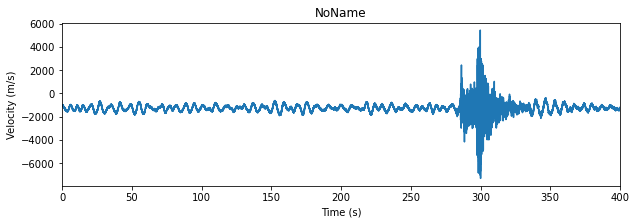

In [235]:
fig,ax = plt.subplots(1,1,figsize=(10,3))

ax.plot(windowed.traces[0].times(), windowed.traces[0].data)
ax.set_xlim([min(windowed.traces[0].times()),max(windowed.traces[0].times())])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.set_title(f'NoName')

plt.plot()

In [ ]:
def randomizeWindow(fileName):
    originalMseed=read(f'{earthDirectory}{fileName}')
    for trace in originalMseed:
        data = trace.data
        n = len(data)

        # Step 1: Randomly choose the start index of the window within the bounds
        # Ensure the window doesn't go out of bounds
        max_start = n - window_size
        start_index = random.randint(0, max_start)
        end_index = start_index + window_size

        # Step 2: Extract the windowed data
        windowed_data = data[start_index:end_index]

        # Update trace data with the new windowed array
        trace.data = windowed_data

        # Step 3: Adjust start time for the new data window
        time_offset = start_index / trace.stats.sampling_rate
        trace.stats.starttime += time_offset
        trace.stats.npts = window_size  # Update number of points

        # Print to verify
        print(f"Trace ID: {trace.id}")
        print(f"New Data Length: {len(trace.data)}")
        print(f"New Start Time: {trace.stats.starttime}")

        #writeFile
        newName = fileName[:22] + "_shifted.mseed"
        newPath = f'{shiftedDirectory}{newName}'
        print(newPath)
    
        trace.write(filename=newPath,format="MSEED")

In [ ]:
for file in os.listdir(earthDirectory):
    randomizeWindow(file)

In [ ]:
for file in os.listdir(shiftedDirectory):
    windowed=read(f'{earthDirectory}{file}')
    windowed.traces[0].stats
    fig,ax = plt.subplots(1,1,figsize=(10,3))

    ax.plot(windowed.traces[0].times(), windowed.traces[0].data)
    ax.set_xlim([min(windowed.traces[0].times()),max(windowed.traces[0].times())])
    ax.set_ylim([-100000,100000])
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Velocity (m/s)")
    ax.set_title(f'{file}')

    plt.plot()

In [227]:
newData = read(f'{earthDirectory}AZ.PFO..HHZ_2017-01-01T01_36_14.156_2017-01-01T01_49_34.156.mseed')
newData.traces[0].stats.npts

80000

In [318]:
'AZ.PFO..HHZ_2017-01-01T01_36_14.156_2017-01-01T01_49_34.156.mseed'[:31]

'AZ.PFO..HHZ_2017-01-01T01_36_14'

In [222]:
800*100

80000

In [320]:
def newRandWindow(fileName, oldDir, newDir):
    windowSize = 40001
    eventRelativeTime = 40001
    stream = read(f'{oldDir}{fileName}')
    for trace in stream:
        data = trace.data
        n = len(data)
        
        max_start = n - window_size - 200
        start_index = random.randint(0, max_start)
        end_index = start_index + window_size 
        
        windowed_data = data[start_index:end_index]
        trace.data = windowed_data
        
        # Step 3: Adjust start time for the new data window
        time_offset = start_index / trace.stats.sampling_rate
        trace.stats.starttime += time_offset
        trace.stats.npts = window_size  # Update number of points

        # Print to verify
        print(f"Trace ID: {trace.id}")
        print(f"New Data Length: {len(trace.data)}")
        print(f"New Start Time: {trace.stats.starttime}")

        #writeFile
        newName = fileName[:31] + "_shifted.mseed"
        newPath = f'{shiftedDirectory}{newName}'
        print(newPath,"\n")
        newEventRelativeTime = (eventRelativeTime - start_index-1)  / trace.stats.sampling_rate
    
        trace.write(filename=newPath,format="MSEED")
        
    return {"filename":newName, "time_rel(sec)":newEventRelativeTime}

In [321]:
df = []
i = 0
for file in os.listdir(earthDirectory):
    print(i+1)
    newFileData = newRandWindow(file,earthDirectory,shiftedDirectory)
    df.append(newFileData)
    i+=1
    
print(i)

1
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2005-01-06T12:07:18.540000Z
C:\Users\Angel\Documents\Trabajo de Investigación\NasaHackaton\earthDataShifted\AZ.PFO..HHZ_2005-01-06T12_05_08_shifted.mseed 

2
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2005-06-12T15:39:40.310000Z
C:\Users\Angel\Documents\Trabajo de Investigación\NasaHackaton\earthDataShifted\AZ.PFO..HHZ_2005-06-12T15_35_08_shifted.mseed 

3
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2005-08-31T16:12:45.840000Z
C:\Users\Angel\Documents\Trabajo de Investigación\NasaHackaton\earthDataShifted\AZ.PFO..HHZ_2005-08-31T16_12_24_shifted.mseed 

4
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2005-08-31T22:43:34.490000Z
C:\Users\Angel\Documents\Trabajo de Investigación\NasaHackaton\earthDataShifted\AZ.PFO..HHZ_2005-08-31T22_39_25_shifted.mseed 

5
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2005-09-01T13:50:01.490000Z
C:\Users\Angel\Documents\Trabajo 

59
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2013-01-17T02:04:02.718400Z
C:\Users\Angel\Documents\Trabajo de Investigación\NasaHackaton\earthDataShifted\AZ.PFO..HHZ_2013-01-17T02_03_35_shifted.mseed 

60
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2013-04-07T19:12:42.758400Z
C:\Users\Angel\Documents\Trabajo de Investigación\NasaHackaton\earthDataShifted\AZ.PFO..HHZ_2013-04-07T19_07_29_shifted.mseed 

61
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2013-05-17T04:37:11.038400Z
C:\Users\Angel\Documents\Trabajo de Investigación\NasaHackaton\earthDataShifted\AZ.PFO..HHZ_2013-05-17T04_31_50_shifted.mseed 

62
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2013-06-03T12:43:38.328400Z
C:\Users\Angel\Documents\Trabajo de Investigación\NasaHackaton\earthDataShifted\AZ.PFO..HHZ_2013-06-03T12_37_09_shifted.mseed 

63
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2013-06-24T22:08:50.468400Z
C:\Users\Angel\Documents\Tra

105
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2017-07-24T18:22:33.348400Z
C:\Users\Angel\Documents\Trabajo de Investigación\NasaHackaton\earthDataShifted\AZ.PFO..HHZ_2017-07-24T18_17_12_shifted.mseed 

106
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2017-12-07T00:30:49.518400Z
C:\Users\Angel\Documents\Trabajo de Investigación\NasaHackaton\earthDataShifted\AZ.PFO..HHZ_2017-12-07T00_26_44_shifted.mseed 

107
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2018-02-11T08:59:58.208400Z
C:\Users\Angel\Documents\Trabajo de Investigación\NasaHackaton\earthDataShifted\AZ.PFO..HHZ_2018-02-11T08_56_04_shifted.mseed 

108
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2018-03-16T04:01:31.998400Z
C:\Users\Angel\Documents\Trabajo de Investigación\NasaHackaton\earthDataShifted\AZ.PFO..HHZ_2018-03-16T04_01_28_shifted.mseed 

109
Trace ID: AZ.PFO..HHZ
New Data Length: 40001
New Start Time: 2018-04-02T13:45:26.878400Z
C:\Users\Angel\Document

In [322]:
df = pd.DataFrame(df)
df

,filename,time_rel(sec)
0,AZ.PFO..HHZ_2005-01-06T12_05_08_shifted.mseed,269.65
1,AZ.PFO..HHZ_2005-06-12T15_35_08_shifted.mseed,128.32
2,AZ.PFO..HHZ_2005-08-31T16_12_24_shifted.mseed,378.31
3,AZ.PFO..HHZ_2005-08-31T22_39_25_shifted.mseed,151.23
4,AZ.PFO..HHZ_2005-09-01T13_43_54_shifted.mseed,33.14
...,...,...
108,AZ.PFO..HHZ_2018-04-02T13_44_36_shifted.mseed,349.40
109,AZ.PFO..HHZ_2018-05-13T11_59_21_shifted.mseed,224.32
110,AZ.PFO..HHZ_2018-09-08T05_33_12_shifted.mseed,224.54
111,AZ.PFO..HHZ_2018-11-15T06_34_02_shifted.mseed,173.58


In [294]:
os.listdir(shiftedDirectory)

['AZ.PFO..HHZ_2005-01-06_shifted.mseed',
 'AZ.PFO..HHZ_2005-06-12_shifted.mseed',
 'AZ.PFO..HHZ_2005-08-31_shifted.mseed',
 'AZ.PFO..HHZ_2005-09-01_shifted.mseed',
 'AZ.PFO..HHZ_2005-11-14_shifted.mseed',
 'AZ.PFO..HHZ_2006-11-29_shifted.mseed',
 'AZ.PFO..HHZ_2006-12-05_shifted.mseed',
 'AZ.PFO..HHZ_2007-04-18_shifted.mseed',
 'AZ.PFO..HHZ_2007-09-23_shifted.mseed',
 'AZ.PFO..HHZ_2007-12-08_shifted.mseed',
 'AZ.PFO..HHZ_2008-03-17_shifted.mseed',
 'AZ.PFO..HHZ_2008-05-09_shifted.mseed',
 'AZ.PFO..HHZ_2008-06-02_shifted.mseed',
 'AZ.PFO..HHZ_2008-09-03_shifted.mseed',
 'AZ.PFO..HHZ_2009-03-19_shifted.mseed',
 'AZ.PFO..HHZ_2009-03-24_shifted.mseed',
 'AZ.PFO..HHZ_2009-03-25_shifted.mseed',
 'AZ.PFO..HHZ_2009-04-26_shifted.mseed',
 'AZ.PFO..HHZ_2009-11-18_shifted.mseed',
 'AZ.PFO..HHZ_2010-02-13_shifted.mseed',
 'AZ.PFO..HHZ_2010-02-17_shifted.mseed',
 'AZ.PFO..HHZ_2010-02-20_shifted.mseed',
 'AZ.PFO..HHZ_2010-03-01_shifted.mseed',
 'AZ.PFO..HHZ_2010-03-13_shifted.mseed',
 'AZ.PFO..HHZ_20

In [323]:
names = df['filename']
files = os.listdir(shiftedDirectory)
print(names[0],files[0])
print(names[0]==files[0])

AZ.PFO..HHZ_2005-01-06T12_05_08_shifted.mseed AZ.PFO..HHZ_2005-01-06T12_05_08_shifted.mseed
True


In [324]:
print(names[3],files[3])
print(names[3]==files[3])

AZ.PFO..HHZ_2005-08-31T22_39_25_shifted.mseed AZ.PFO..HHZ_2005-08-31T22_39_25_shifted.mseed
True


In [325]:
for i in range(len(names)):
    print(names[i]==files[i])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [326]:
len(os.listdir(shiftedDirectory))

113

In [327]:
len(df)

113

         network: AZ
         station: PFO
        location: 
         channel: HHZ
       starttime: 2005-11-14T21:57:22.160000Z
         endtime: 2005-11-14T22:04:02.160000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 40001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 12, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 49152})


[]

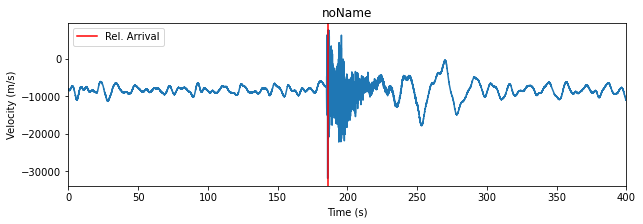

In [328]:
register = df.iloc[5]
registerMseed = read(f'{shiftedDirectory}{register.filename}')
print(registerMseed.traces[0].stats)
numericData=registerMseed.traces[0].copy()
times = numericData.times()
intensity = numericData.data
## time series figure
fig = plt.figure(figsize=(10,3))
ax = plt.subplot(1,1,1)

ax.plot(times, intensity)
ax.axvline(x = register['time_rel(sec)'], color="red", label="Rel. Arrival")
ax.legend(loc = "upper left")
ax.set_xlim([min(times),max(times)])
ax.set_xlabel("Time (s)")
ax.set_ylabel("Velocity (m/s)")
ax.set_title(f'noName')
plt.plot()

In [329]:
register

filename         AZ.PFO..HHZ_2005-11-14T21_53_48_shifted.mseed
time_rel(sec)                                           185.85
Name: 5, dtype: object

In [330]:
df.to_csv(f'{shiftedDirectory}PFO_catalog_final.csv')

In [331]:
df

,filename,time_rel(sec)
0,AZ.PFO..HHZ_2005-01-06T12_05_08_shifted.mseed,269.65
1,AZ.PFO..HHZ_2005-06-12T15_35_08_shifted.mseed,128.32
2,AZ.PFO..HHZ_2005-08-31T16_12_24_shifted.mseed,378.31
3,AZ.PFO..HHZ_2005-08-31T22_39_25_shifted.mseed,151.23
4,AZ.PFO..HHZ_2005-09-01T13_43_54_shifted.mseed,33.14
...,...,...
108,AZ.PFO..HHZ_2018-04-02T13_44_36_shifted.mseed,349.40
109,AZ.PFO..HHZ_2018-05-13T11_59_21_shifted.mseed,224.32
110,AZ.PFO..HHZ_2018-09-08T05_33_12_shifted.mseed,224.54
111,AZ.PFO..HHZ_2018-11-15T06_34_02_shifted.mseed,173.58


In [332]:
os.mkdir(f'{shiftedDirectory}training\\')
os.mkdir(f'{shiftedDirectory}test\\')

In [334]:
from sklearn.model_selection import train_test_split

In [338]:
X, y = df['filename'],df['time_rel(sec)']

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [343]:
type(X_train)

pandas.core.series.Series

In [345]:
X_train_new = np.array(X_train).reshape(-1, 1)
y_train_new = np.array(y_train).reshape(-1, 1)
train_array = np.concatenate((X_train_new, y_train_new), axis=1)

In [348]:
trainDF=pd.DataFrame(train_array,columns=["filename","time_rel(sec)"])
trainDF

,filename,time_rel(sec)
0,AZ.PFO..HHZ_2010-10-13T12_01_07_shifted.mseed,18.6
1,AZ.PFO..HHZ_2013-10-14T12_31_52_shifted.mseed,282.21
2,AZ.PFO..HHZ_2018-09-08T05_33_12_shifted.mseed,224.54
3,AZ.PFO..HHZ_2018-03-16T04_01_28_shifted.mseed,396.66
4,AZ.PFO..HHZ_2010-02-20T04_02_20_shifted.mseed,294.49
...,...,...
85,AZ.PFO..HHZ_2018-02-11T08_56_04_shifted.mseed,166.12
86,AZ.PFO..HHZ_2008-09-03T17_57_38_shifted.mseed,26.75
87,AZ.PFO..HHZ_2016-10-31T10_34_44_shifted.mseed,316.72
88,AZ.PFO..HHZ_2012-08-26T20_51_36_shifted.mseed,163.6


In [351]:
X_test_new = np.array(X_test).reshape(-1, 1)
y_test_new = np.array(y_test).reshape(-1, 1)
test_array = np.concatenate((X_test_new, y_test_new), axis=1)

In [352]:
testDF=pd.DataFrame(test_array,columns=["filename","time_rel(sec)"])
testDF

,filename,time_rel(sec)
0,AZ.PFO..HHZ_2015-12-18T00_14_34_shifted.mseed,397.58
1,AZ.PFO..HHZ_2005-09-01T13_43_54_shifted.mseed,33.14
2,AZ.PFO..HHZ_2011-10-22T21_26_31_shifted.mseed,329.39
3,AZ.PFO..HHZ_2014-04-22T09_53_38_shifted.mseed,386.33
4,AZ.PFO..HHZ_2007-12-08T13_49_22_shifted.mseed,58.24
5,AZ.PFO..HHZ_2012-06-19T03_55_09_shifted.mseed,83.19
6,AZ.PFO..HHZ_2014-06-14T06_34_48_shifted.mseed,228.32
7,AZ.PFO..HHZ_2013-09-30T04_17_03_shifted.mseed,321.96
8,AZ.PFO..HHZ_2012-08-21T02_33_50_shifted.mseed,165.63
9,AZ.PFO..HHZ_2008-03-17T14_10_19_shifted.mseed,242.72


In [354]:
trainDF.to_csv(f'{shiftedDirectory}PFO_catalog_train.csv')

In [355]:
testDF.to_csv(f'{shiftedDirectory}PFO_catalog_test.csv')

In [362]:
for file in trainDF['filename']:
    if file in os.listdir(shiftedDirectory):
        shutil.move(f'{shiftedDirectory}{file}',f'{shiftedDirectory}training\\{file}')

In [363]:
for file in testDF['filename']:
    if file in os.listdir(shiftedDirectory):
        shutil.move(f'{shiftedDirectory}{file}',f'{shiftedDirectory}test\\{file}')

In [357]:
trainDF

,filename,time_rel(sec)
0,AZ.PFO..HHZ_2010-10-13T12_01_07_shifted.mseed,18.6
1,AZ.PFO..HHZ_2013-10-14T12_31_52_shifted.mseed,282.21
2,AZ.PFO..HHZ_2018-09-08T05_33_12_shifted.mseed,224.54
3,AZ.PFO..HHZ_2018-03-16T04_01_28_shifted.mseed,396.66
4,AZ.PFO..HHZ_2010-02-20T04_02_20_shifted.mseed,294.49
...,...,...
85,AZ.PFO..HHZ_2018-02-11T08_56_04_shifted.mseed,166.12
86,AZ.PFO..HHZ_2008-09-03T17_57_38_shifted.mseed,26.75
87,AZ.PFO..HHZ_2016-10-31T10_34_44_shifted.mseed,316.72
88,AZ.PFO..HHZ_2012-08-26T20_51_36_shifted.mseed,163.6
